# Logistic Regression

In [1]:
import pandas as pd
import scipy as sc
import statsmodels.formula.api as sm
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')


**Main idea:** Given the predictor variable  X, we model the *probability* that $Y = 1$ by 
$$
p(X) = p(Y = 1 | \ X) = \frac{e^{\beta_0 + \beta_1 X}}{1+ e^{\beta_0 + \beta_1 X}}
$$

The function on the right hand side can be written $\textrm{logistic}(\beta_0 + \beta_1 X)$ where the *logistic function* or *sigmoid function*,  
$$
\textrm{logistic}(x) := \frac{e^x}{1 + e^x} = \frac{1}{1+ e^{-x}}. 
$$
We can write the model succinctly as 
$$
p(X) = \textrm{logistic}( \beta_0 + \beta_1 X ).  
$$

One can check that the model is equivlant to 
$$
\log \left( \frac{p(X)}{1-p(X)} \right) = \beta_0 + \beta_1 X. 
$$

Sometimes, the function on the left hand side of is called the *logit function*, 
$$
\textrm{logit}(p) := \log \left( \frac{p}{1-p} \right). 
$$

We can equivalently write the model as 

$$
\textrm{logit} ( p(X) ) = \beta_0 + \beta_1 X.  
$$


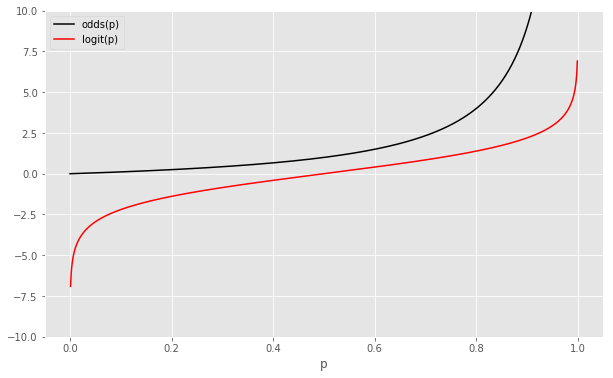

In [11]:
#plot odds and logit("log-odds")
p = np.linspace(0,1,1000)
odds = lambda p: p/(1-p)
logit = lambda p: np.log(odds(p))
plt.plot(p,odds(p),color='Black',label='odds(p)')
plt.plot(p,logit(p),color='red',label='logit(p)')
plt.legend(loc='upper left')
plt.xlabel('p')
plt.ylim(-10,10)
plt.show()

(-0.1, 1.1)

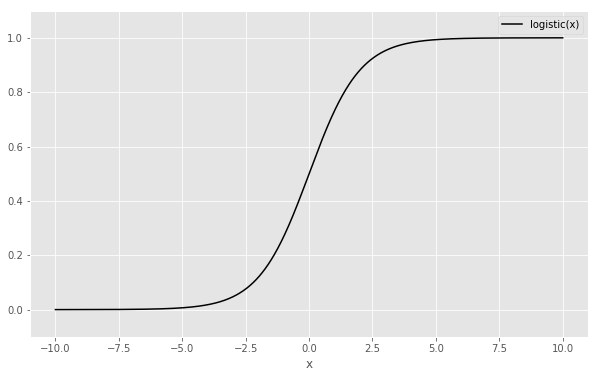

In [12]:
#plot the sigmoid/logistic functions
x = np.linspace(-10,10,1000)
logistic = lambda x: 1/(1+sc.exp(-x)) #logistic/sigmoid function
plt.plot(x,logistic(x),color='Black',label='logistic(x)')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylim(-.1,1.1)

# Example 1
### Using statsmodels.logit() to determine how many hours you need to study to pass the exam? 

This example was taken from [wikipedia](https://en.wikipedia.org/wiki/Logistic_regression). 

    hours  pass_exam
0    0.50          0
1    0.75          0
2    1.00          0
3    1.25          0
4    1.50          0
5    1.75          0
6    1.75          1
7    2.00          0
8    2.25          1
9    2.50          0
10   2.75          1
11   3.00          0
12   3.25          1
13   3.50          0
14   4.00          1
15   4.25          1
16   4.50          1
17   4.75          1
18   5.00          1
19   5.50          1


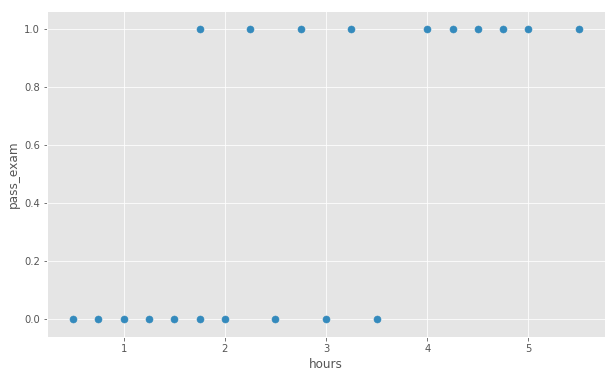

In [13]:
hours = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50] 
pass_Exam = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
df = pd.DataFrame({"hours": hours, "pass_exam": pass_Exam})
print(df)

df.plot.scatter(x='hours',y='pass_exam',s=50)

For this example, we want to find coefficients $\beta_0$ and $\beta_1$ so that the model

$$
p(X) = \textrm{probability}(\textrm{passing} | \ \textrm{X hours studying} ) = \textrm{logistic}( \beta_0 + \beta_1 X )
$$
best explains the data. 

In [14]:
#We can use the 'logit' function from the statsmodels python library. 
model = sm.logit(formula="pass_Exam ~ hours", data=df)
model_result = model.fit()
print(model_result.summary())

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              pass_Exam   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 Jan 2018   Pseudo R-squ.:                  0.4208
Time:                        08:47:10   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                 0.0006365
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.

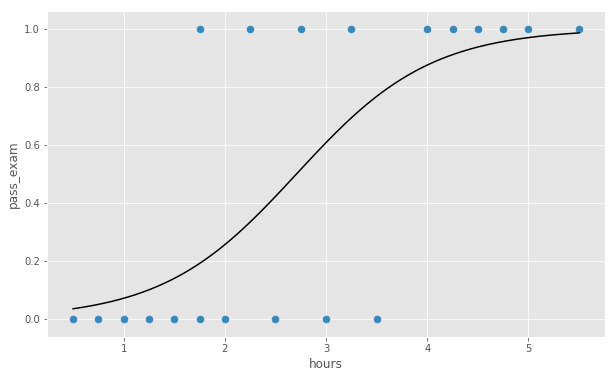

In [16]:
df.plot.scatter(x='hours',y='pass_exam',s=50)
x = sc.linspace(df['hours'].min(),df['hours'].max(),1000)
par = dict(model_result.params)
plt.plot(x,logistic(par['Intercept'] + par['hours']*x),color='Black')

The plot shows hours vs. whether or not the student passed and the logistic regression curve. The curve predicts the probability that a student will pass, given how many hours they've studied. 

From the plot, we can see that the more hours you spend studying, the more likely you are to pass the exam. (obviously)

If I study just 1.4 hours, what is the likelihood that I'll pass? 

In [96]:
logistic(par['Intercept'] + par['hours']*1.4)

0.12225899837582443

After studying just 1.4 hours, I'm only $12.2\%$ likely to pass. 

How many hours do you have to study in order for the probability of passing to be greater than $50\%$?

From the plot, it looks like $\approx 2.75$ hours. How can we find this number from the logistic regression? 

In [97]:
prob_passing = 0.5
print((logit(prob_passing) - par['Intercept'])/par['hours'])

2.71008262425


# Example 2
### Using sklearn for multi-class Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1


In [90]:
# how many types of glass do we have?
glass.glass_type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

#### Can we use Logistic Regression to tell us which type of glass we have (Household glass vs Window Glass) based on the amount of Aluminum in the glass?

In [105]:
# First we need to consolidate the glass types to either WINDOW/HOUSEHOLD
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred_class
id,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1,0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1,0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1,0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1,0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1,0,0


In [110]:
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

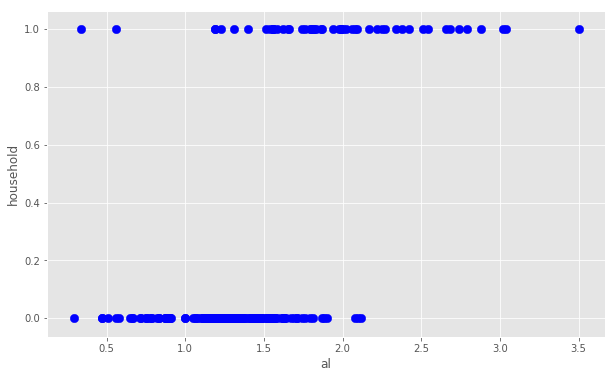

In [106]:
plt.scatter(glass.al, glass.household,s=70,c='b')
plt.xlabel('al')
plt.ylabel('household')

In [104]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

In [107]:
# store the predicted probabilites of class 1
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [112]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1,0,0,0.042487
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1,0,0,0.116270
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1,0,0,0.218272
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1,0,0,0.089410
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1,0,0,0.073790


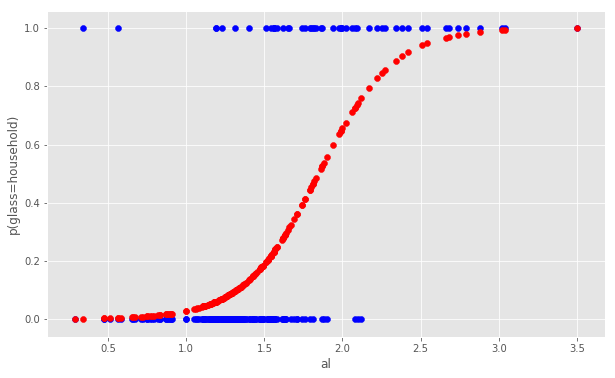

In [116]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household, color='b')
plt.scatter(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('p(glass=household)')

In [117]:
# compute predicted log-odds for al=2 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([ 0.64722323])

In [118]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([ 1.91022919])

In [119]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([ 0.65638445])

In [120]:
# compute predicted probability for al=2 using the predict_proba method
logreg.predict_proba(2)[:, 1]

array([ 0.65638445])

In [125]:
# examine the coefficient for al
logreg.coef_[0]

array([ 4.18040386])

**Interpretation:** A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

In [126]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.99205808391674566

In [127]:
# we can also compute predicted probability for al=3 
# using the predict_proba method
logreg.predict_proba(3)[:, 1]

array([ 0.99205808])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [128]:
# examine the intercept
logreg.intercept_

array([-7.71358449])

**Interpretation:** For an 'al' value of 0, the log-odds of 'household' is -7.71.

In [129]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([ 0.00044652])

That makes sense from the plot, because the probability of household=1 should be very low for such a low 'al' value.

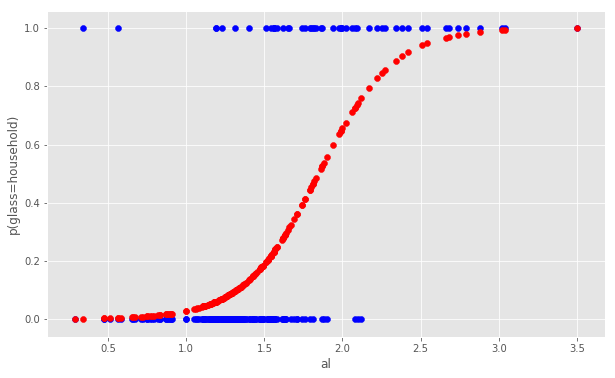

In [131]:
# plot the predicted probabilities
plt.scatter(glass.al, glass.household, color='b')
plt.scatter(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('p(glass=household)')

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.